# Heloc w/SEDC Data insights

This might help us gain som insight into why it is such a difficult to predict the expected explanation label. 

In [33]:
import pandas
with_explanations = pandas.read_csv('../data/heloc_with_explanations.csv')
heloc = pandas.read_csv('../data/heloc_dataset_v1.csv')

## Distribution of training data classes

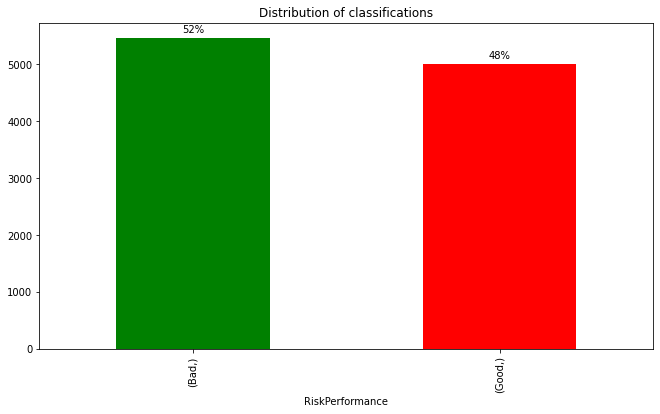

In [52]:
RiskCounts = with_explanations.value_counts(subset=["RiskPerformance"])
count_sum = len(with_explanations.iloc[:,0])
ax = RiskCounts.plot(kind="bar", title="Distribution of classifications", color = list('gr'), figsize=(11,6))

# Add percentages to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{(height/count_sum):.0%}', (x + width/2, y + height*1.02), ha='center')

## Original duplicates vs. removed -7 and -9 rows

The dataset contains a lot of rows with -9, which indicates that all data is missing or corrupted.
-7 is used for individual values that is missing.

<AxesSubplot:title={'center':'Duplicates with -7 and -9 removed'}, ylabel='Duplicates'>

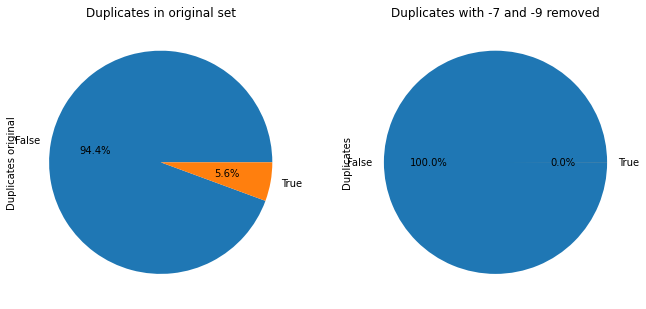

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,6))
# Original
dupes = heloc.duplicated()
dupes_count= dupes.value_counts()
dupes_count.plot(kind="pie", title="Duplicates in original set", ax=ax1, ylabel="Duplicates original", autopct="%1.1f%%")

# Pruned
pruned = pandas.read_csv('../data/heloc_dataset_v1_pruned.csv')
pruned_dupes = pruned.duplicated().value_counts()
pruned_dupes.plot(kind="pie", title="Duplicates with -7 and -9 removed", ax=ax2, ylabel="Duplicates", autopct="%1.1f%%")

It is an interesting note that there are absolutely no duplicates when the -9 and -7 rows are removed.

## Distribution of explanations

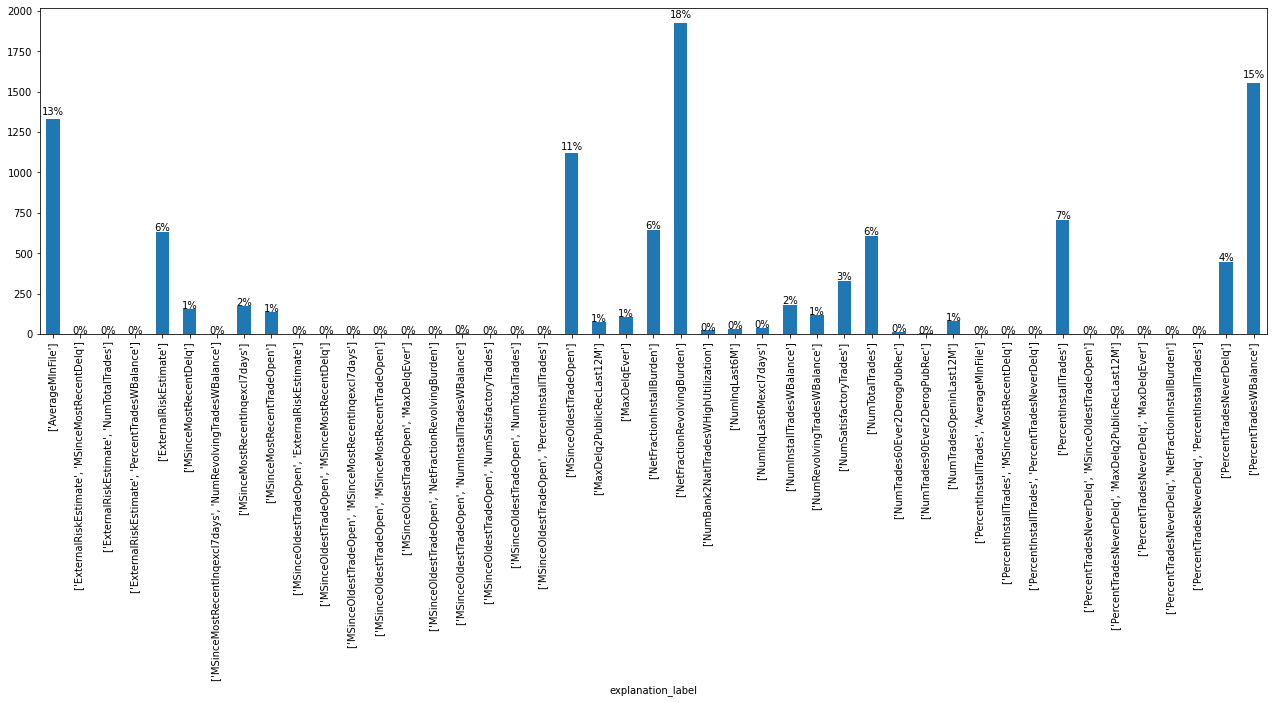

In [124]:
grouped = with_explanations.groupby(by="explanation_label")
bars = grouped.size().plot(kind="bar", figsize=(22,6))
count_sum = with_explanations.shape[0]

for p in bars.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    bars.annotate(f'{(height/count_sum):.0%}', (x + width/2, y + height*1.02), ha='center')


## All values in original and pruned

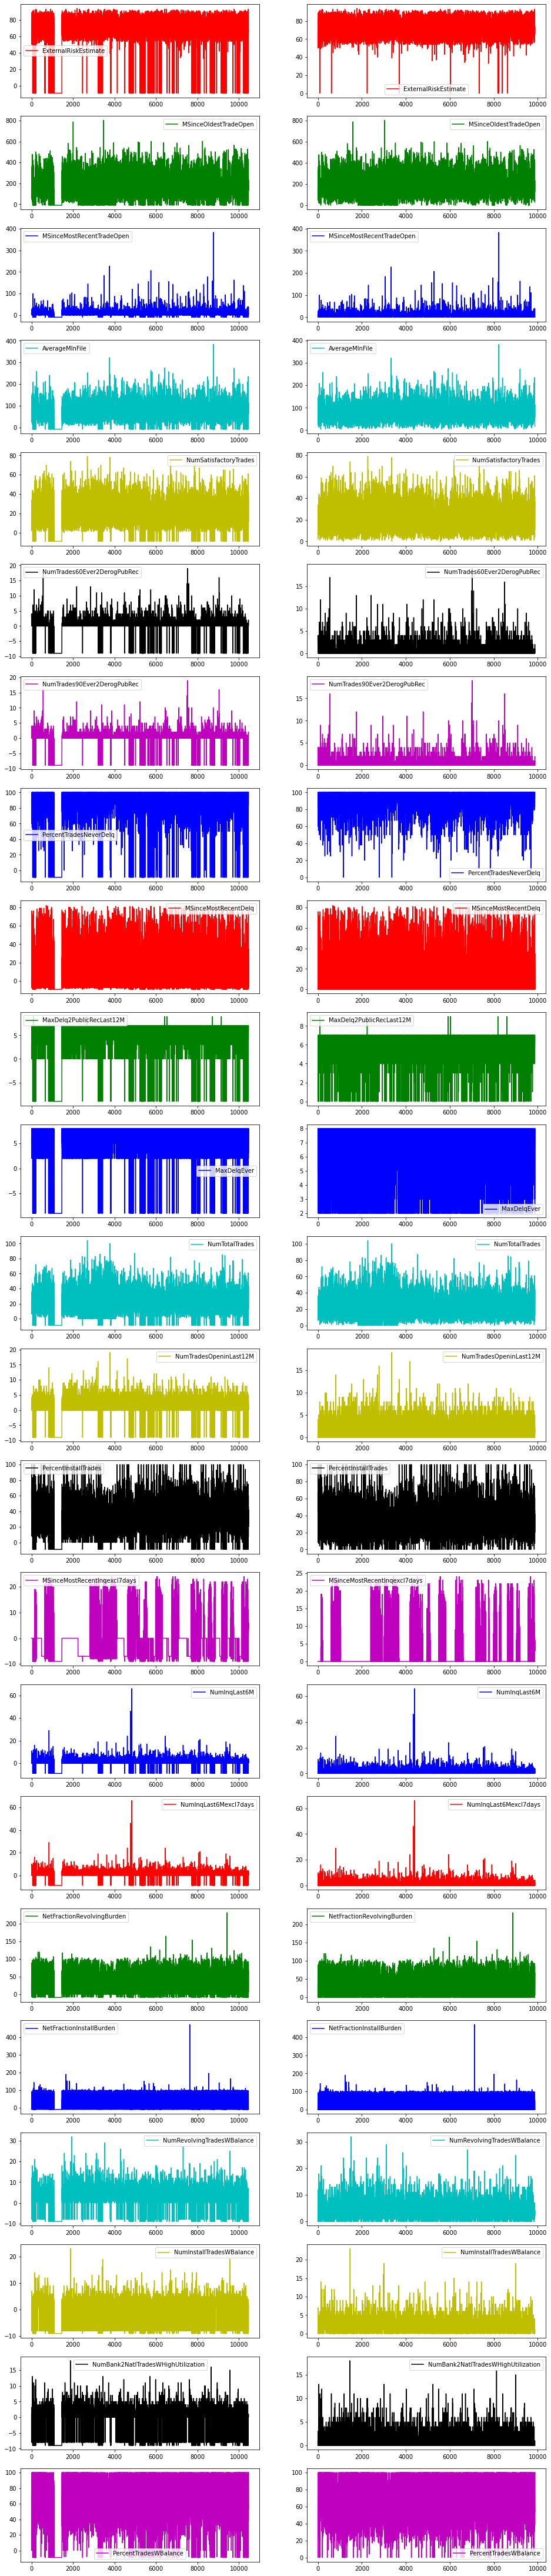

In [94]:
import matplotlib.pyplot as plt
colors = list("rgbcykmbrgbcykmbrgbcykmbrgbcykmbrgbcykmb")
fig, axes = plt.subplots(23,2, figsize=(16,80))
for index, column in enumerate(heloc.columns[1:]):
    heloc.plot(kind="line", y=column, color=colors[index], ax=axes[index][0])
    pruned.plot(kind="line", y=column, color=colors[index], ax=axes[index][1])
